In [1]:

import platform
import os

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 7  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'ss1_test_12-18-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run_1'

det_single = 'strip_strip_1'

# file_nums = list(range(0, 10))
file_nums = 'all'

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position
z_rot_range = [-5, 5]

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 20/20 [00:00<00:00, 37.58it/s]


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
det.center[2] = 712
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

print(f'Detector center: {det.center}')
print(f'Detector active size: {det.active_size}')

det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_2': 450}
Detector center: [  0   0 712]
Detector active size: [127.4375 127.25     4.    ]
Reading in data...


100%|██████████| 20/20 [00:03<00:00,  6.39it/s]


Read in data shape: (27125, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 58.75it/s]


Fitting time: 0.40647315979003906 s
Processed chunk 1/1
Getting hits...
Hits shape: (27125, 256)


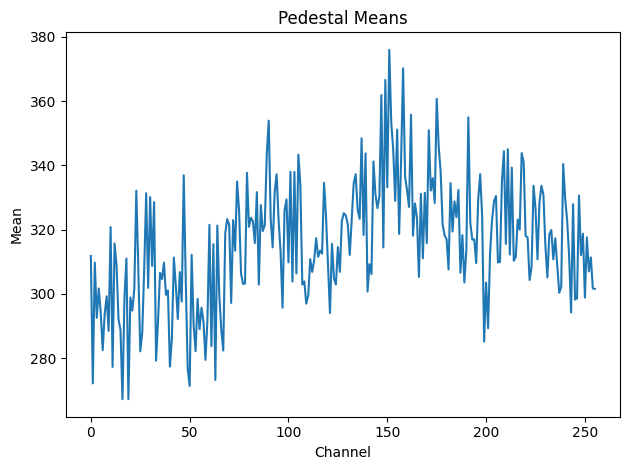

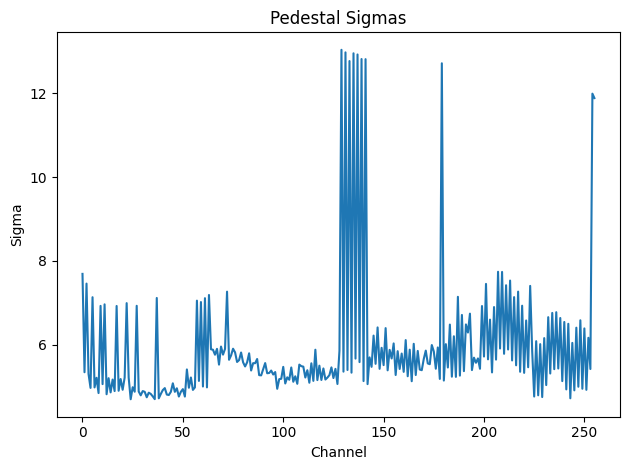

In [6]:
det.dream_data.plot_pedestals()

C:\Users\Dylan\PycharmProjects\saclay_micromegas\DreamData.py:678: RuntimeWarning: invalid value encountered in divide
  max_amp_div_sum = event_max_amps / event_amp_sums


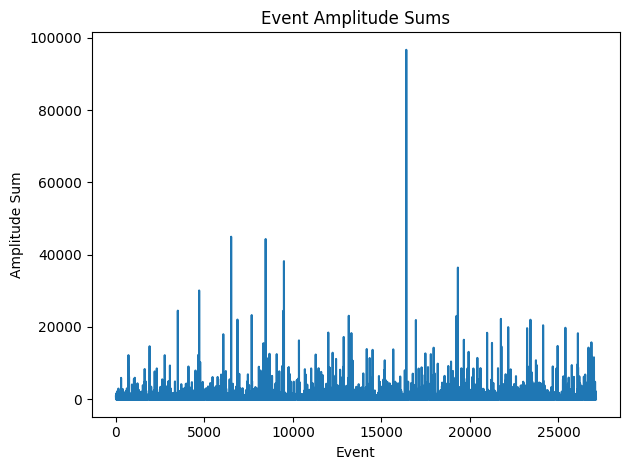

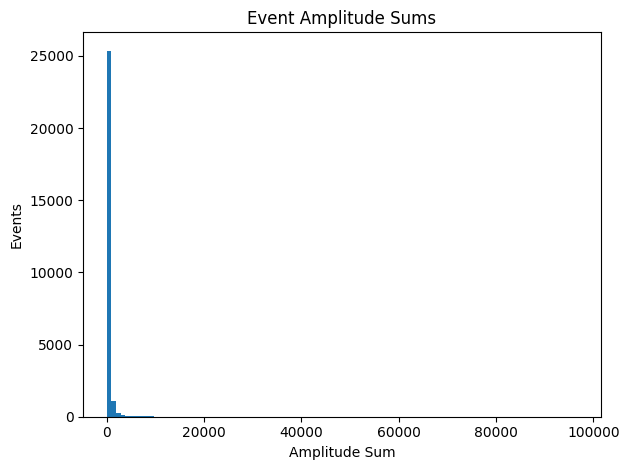

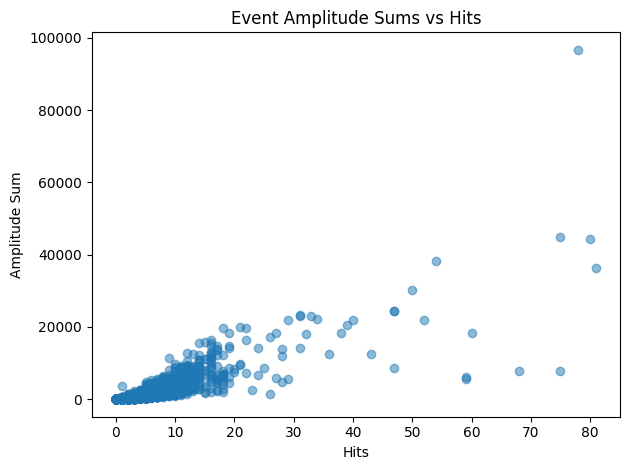

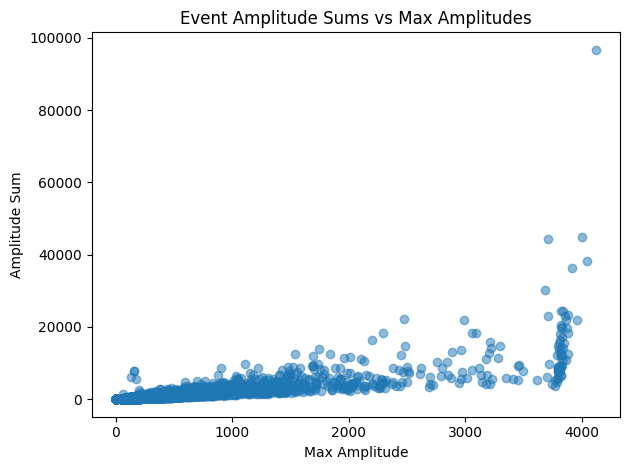

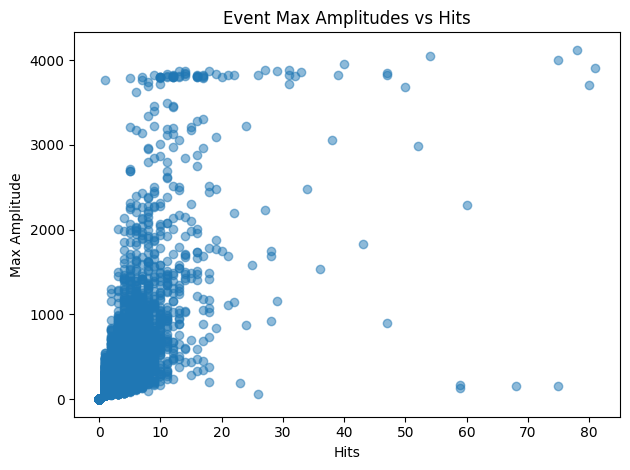

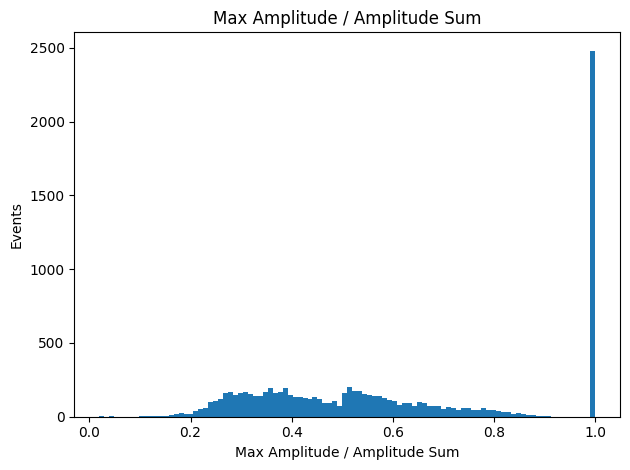

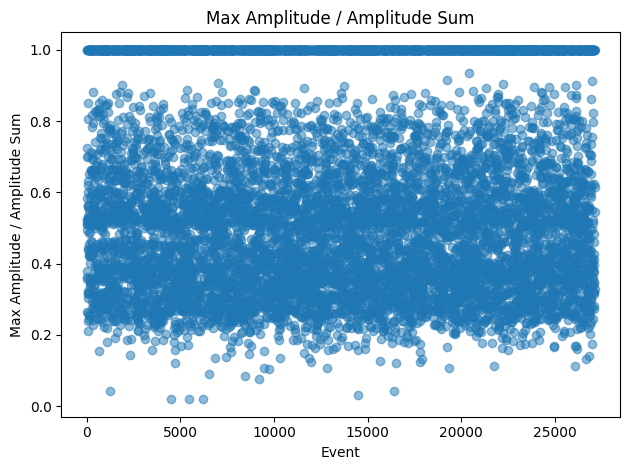

In [7]:
det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: [0 2]
Connector 2 Dead Strips: []
Connector 3 Dead Strips: [129 131 133 135 137 139 141 179]
Connector 4 Dead Strips: [240 241 242 243 244 245 246 247 248 249 250 252 253 254 255]


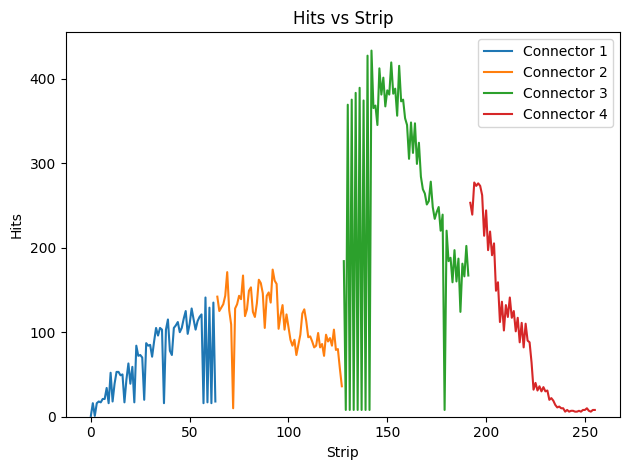

In [8]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

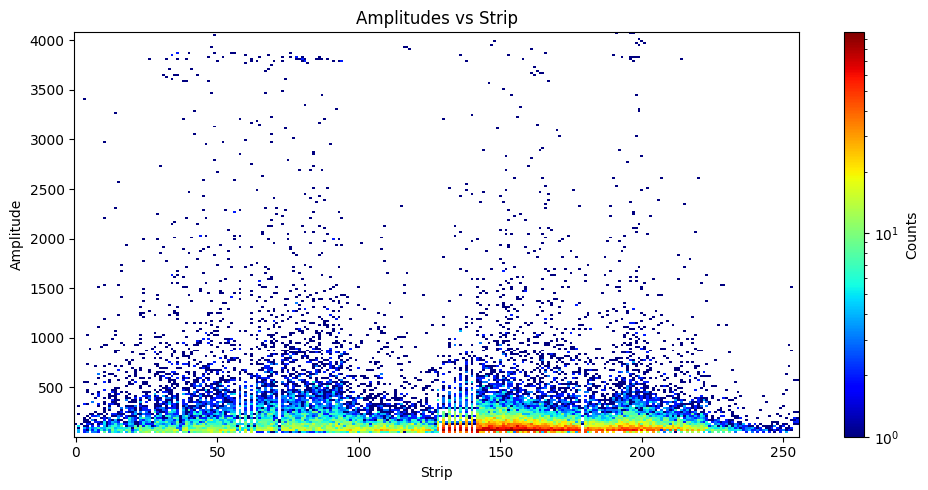

In [9]:
det.dream_data.plot_amplitudes_vs_strip()

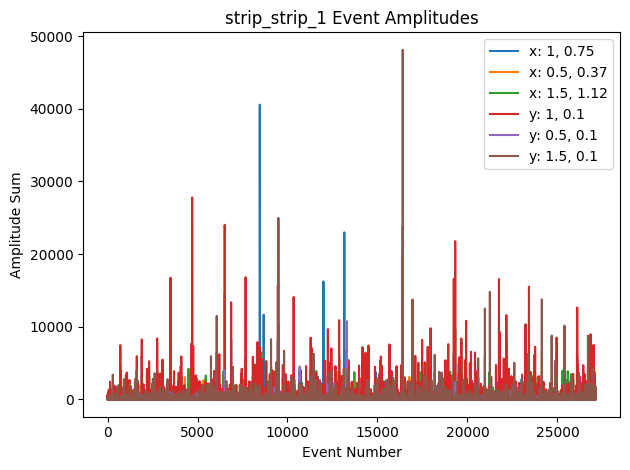

In [10]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.add_rotation(90, 'z')

Detector center: [  0   0 712]
Detector rotations: []


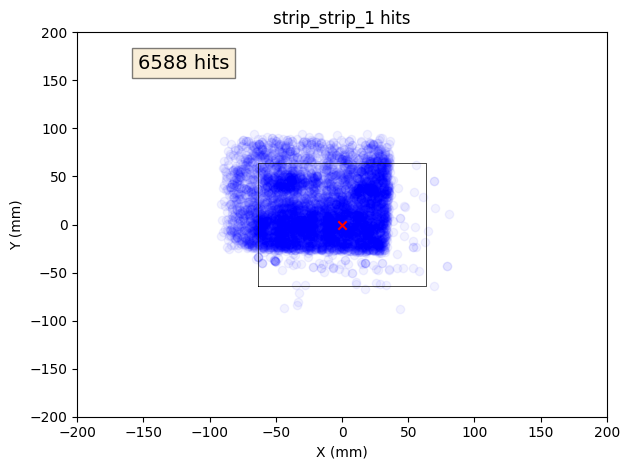

In [11]:
plot_ray_hits_2d(det, ray_data)
print(f'Detector center: {det.center}')
print(f'Detector rotations: {det.rotations}')

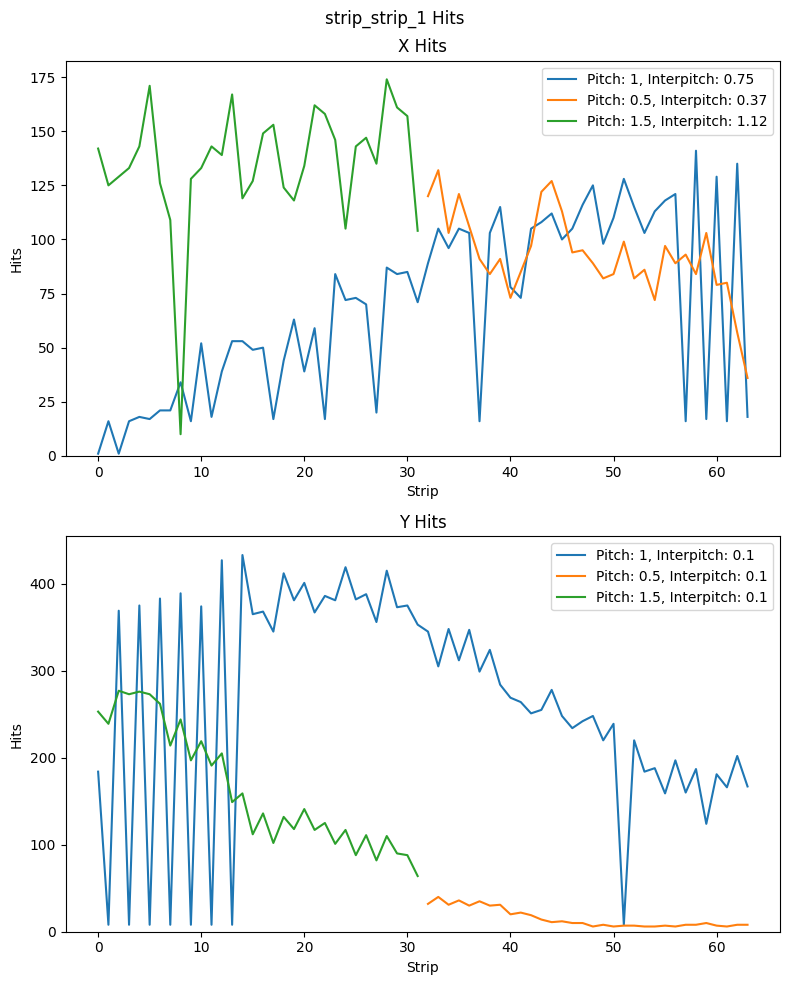

In [12]:
det.plot_hits_1d()

In [13]:
print(len(det.dream_data.hits))

27125


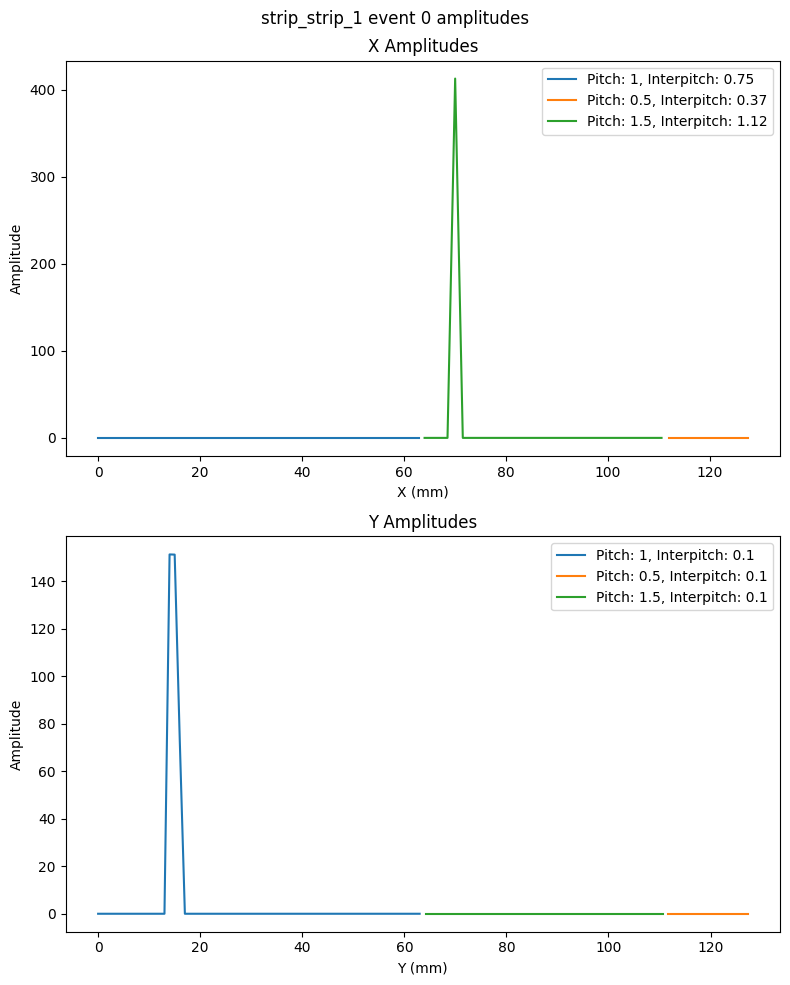

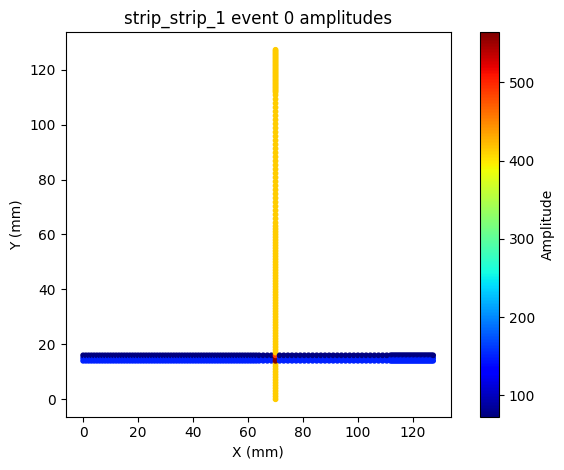

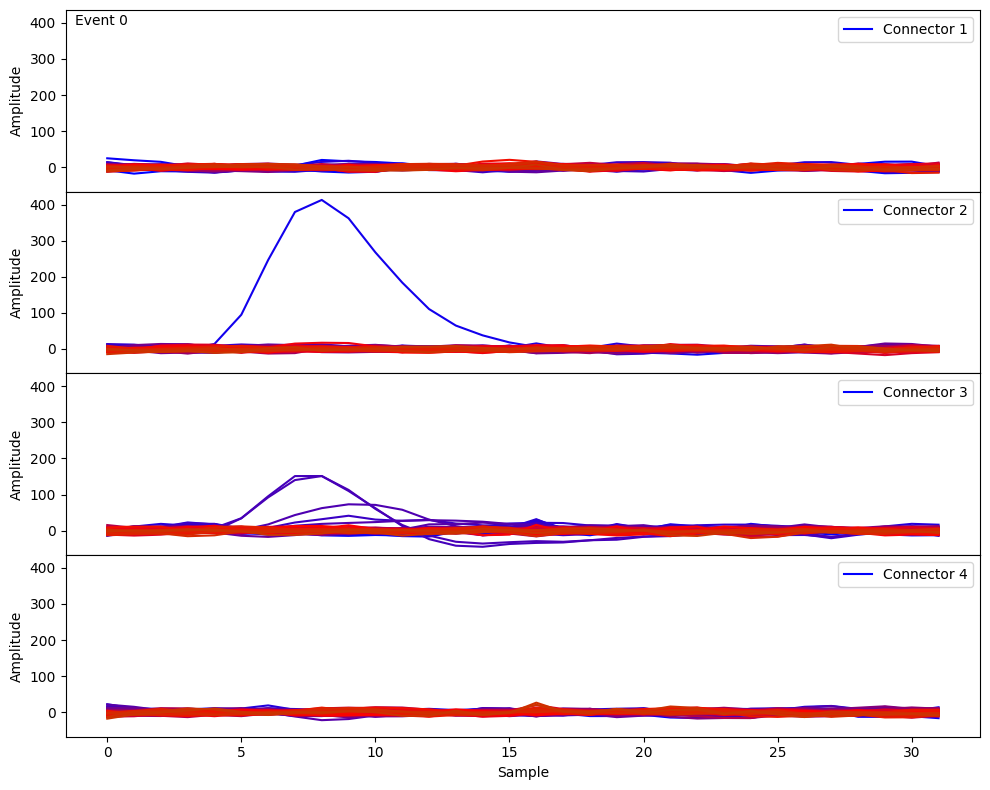

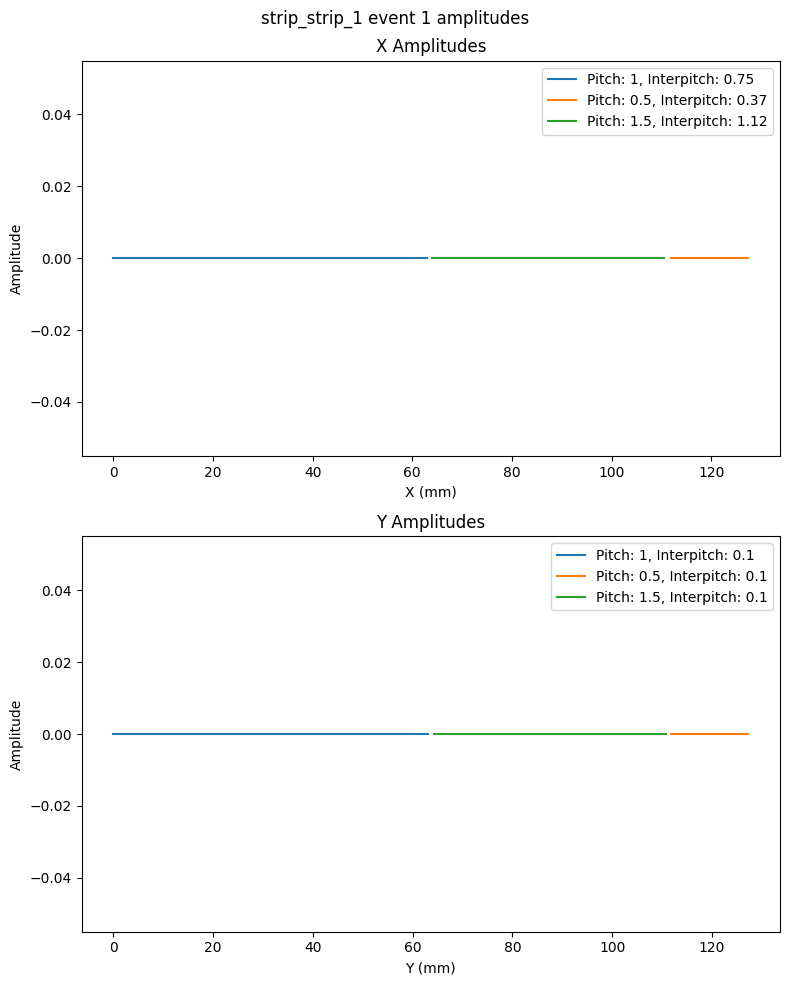

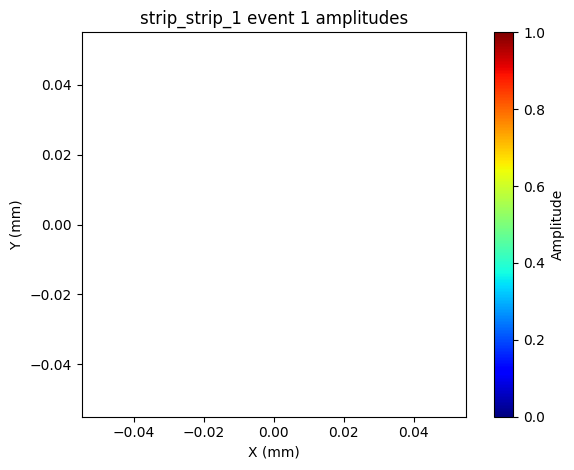

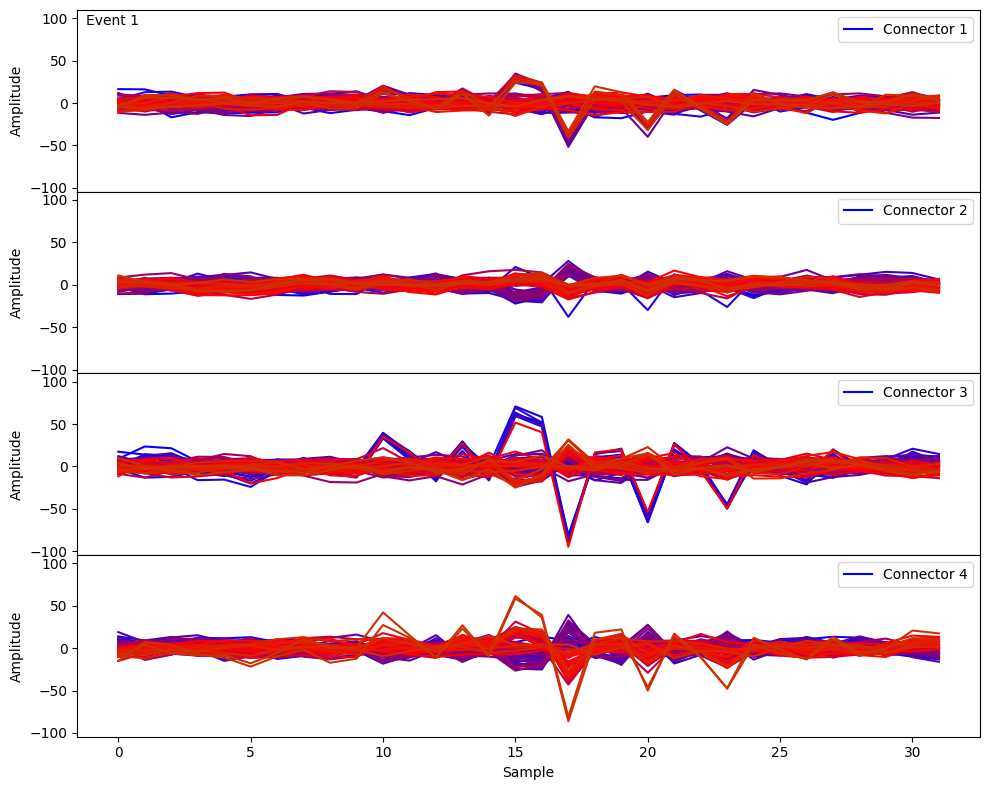

In [14]:
for event_num in range(min(len(det.dream_data.hits), 2)):
    det.plot_event_1d(event_num)
    det.plot_event_2d(event_num)
    det.dream_data.plot_waveforms(event_num)

z: 707.0
z: 707.3448275862069
z: 707.6896551724138
z: 708.0344827586207
z: 708.3793103448276
z: 708.7241379310345
z: 709.0689655172414
z: 709.4137931034483
z: 709.7586206896551
z: 710.1034482758621
z: 710.448275862069
z: 710.7931034482758
z: 711.1379310344828
z: 711.4827586206897
z: 711.8275862068965
z: 712.1724137931035
z: 712.5172413793103
z: 712.8620689655172
z: 713.2068965517242
z: 713.551724137931
z: 713.8965517241379
z: 714.2413793103449
z: 714.5862068965517
z: 714.9310344827586
z: 715.2758620689655
z: 715.6206896551724
z: 715.9655172413793
z: 716.3103448275862
z: 716.6551724137931
z: 717.0
z_rot: -5.0
z_rot: -4.655172413793103
z_rot: -4.310344827586206
z_rot: -3.9655172413793105
z_rot: -3.6206896551724137
z_rot: -3.275862068965517
z_rot: -2.9310344827586206
z_rot: -2.586206896551724
z_rot: -2.2413793103448274
z_rot: -1.8965517241379306
z_rot: -1.5517241379310343
z_rot: -1.206896551724138
z_rot: -0.8620689655172411
z_rot: -0.5172413793103443
z_rot: -0.1724137931034484
z_rot: 0.17

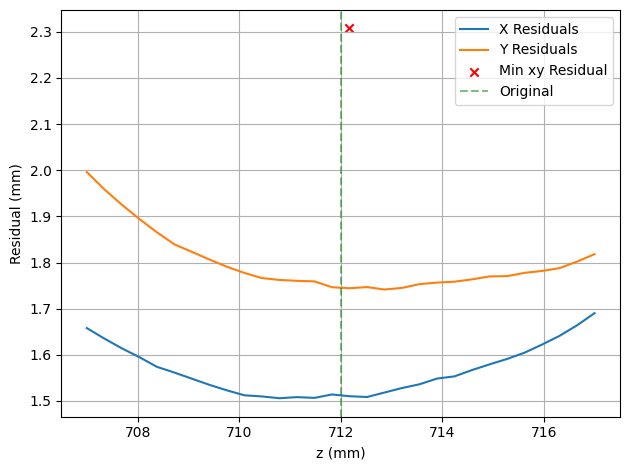

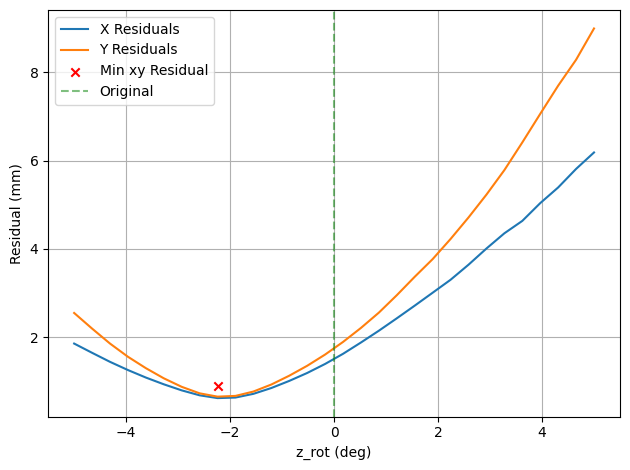

In [15]:
# z_orig = det.center[2]
# x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
# y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
# ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    # det.add_rotation(-90, 'z')
    align_dream(det, ray_data, z_align_range, z_rot_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

Detector center: [-28.17759648  37.2455688  712.17241379]
Detector rotations: [[-2.2413793103448274, 0, 0]]


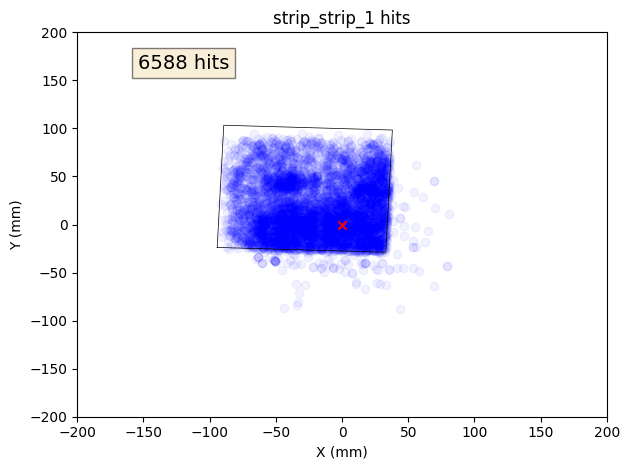

In [16]:
plot_ray_hits_2d(det, ray_data)
print(f'Detector center: {det.center}')
print(f'Detector rotations: {det.rotations}')

Pre-filtered rays: 136110
All rays: 29232


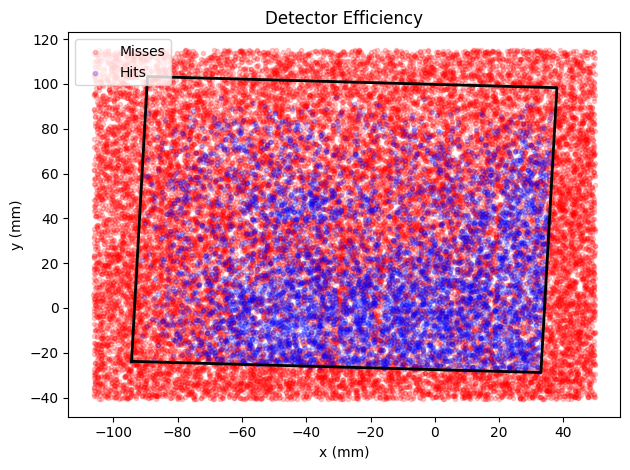

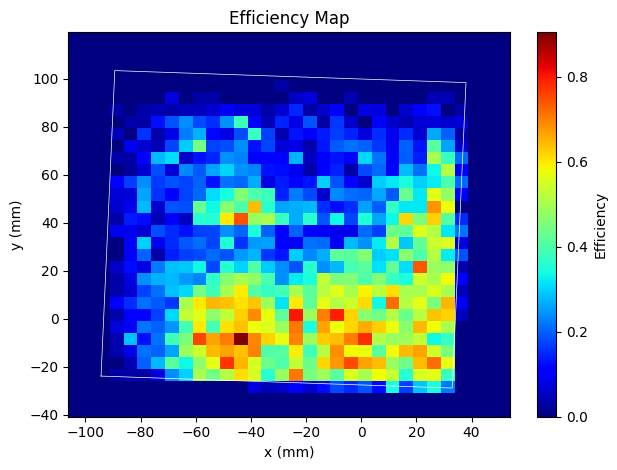

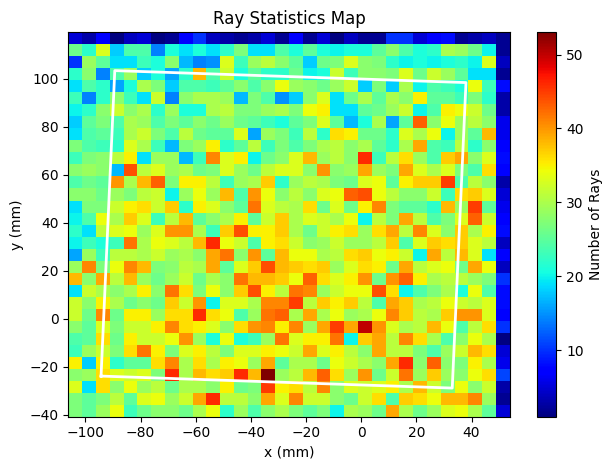

In [17]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2)

X Residuals: Mean=-65μm, Std=581μm
Y Residuals: Mean=58μm, Std=659μm
Error fitting residuals for pitch: (1, 0.5) mm, interpitch: (0.75, 0.1) mm
X Residuals: Mean=47μm, Std=568μm
Y Residuals: Mean=93μm, Std=542μm
X Residuals: Mean=-15μm, Std=474μm
Y Residuals: Mean=-123μm, Std=613μm
Error fitting residuals for pitch: (0.5, 0.5) mm, interpitch: (0.37, 0.1) mm


C:\Users\Dylan\PycharmProjects\saclay_micromegas\poc\det_classes_test.py:883: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(ncols=2)


X Residuals: Mean=4μm, Std=483μm
Y Residuals: Mean=-20μm, Std=536μm
X Residuals: Mean=-44μm, Std=681μm
Y Residuals: Mean=-50μm, Std=653μm
X Residuals: Mean=477μm, Std=277μm
Y Residuals: Mean=25μm, Std=719μm
X Residuals: Mean=136μm, Std=603μm
Y Residuals: Mean=-27μm, Std=589μm


(-0.01355253060822682,
 -0.0058210181785380045,
 0.5954534857159774,
 0.6242131741445234)

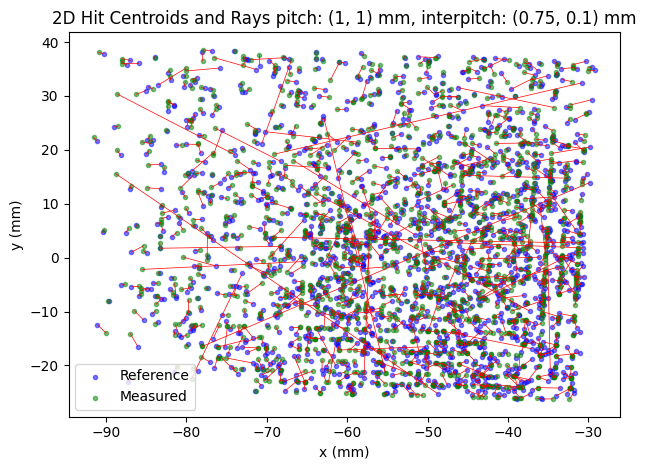

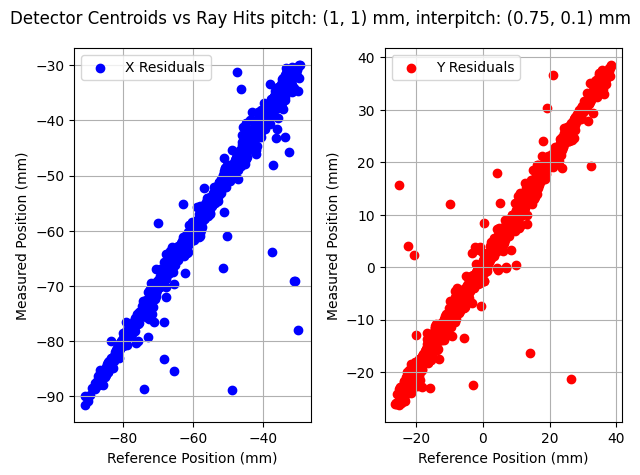

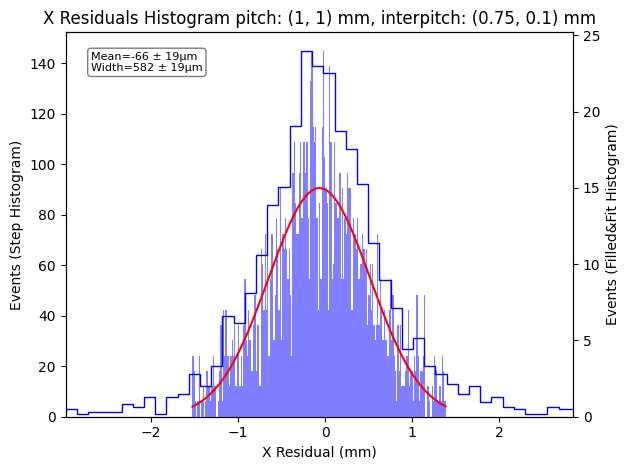

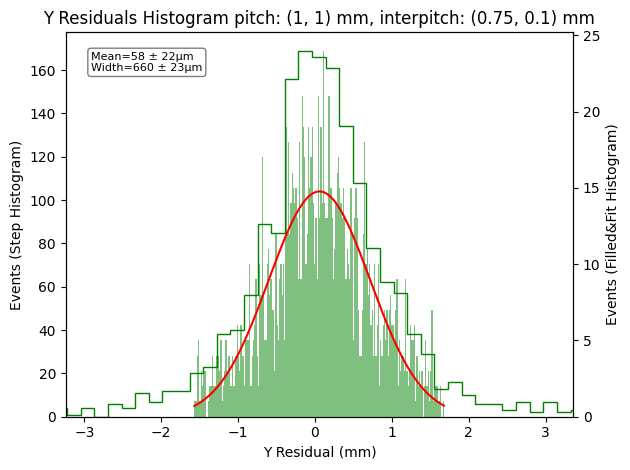

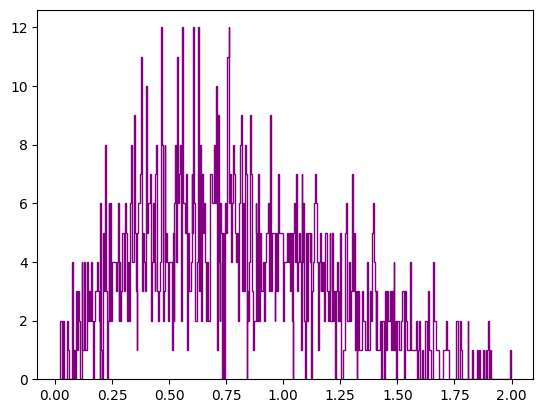

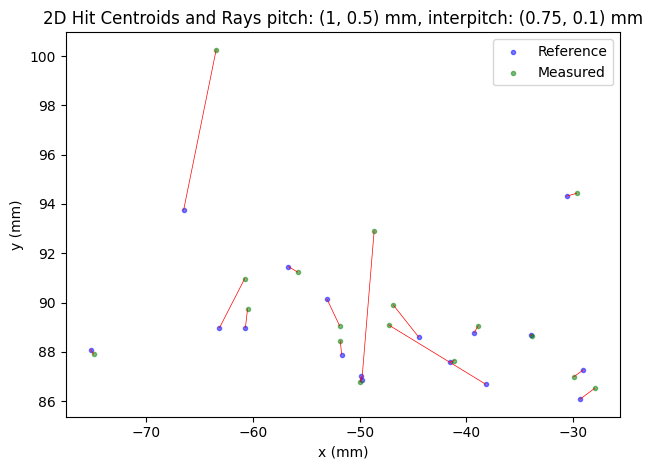

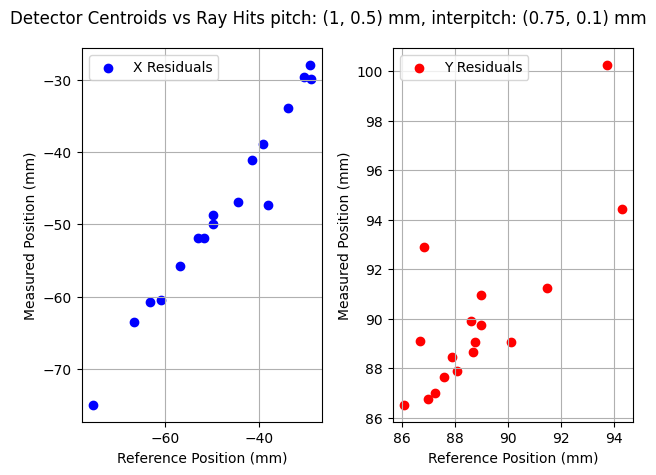

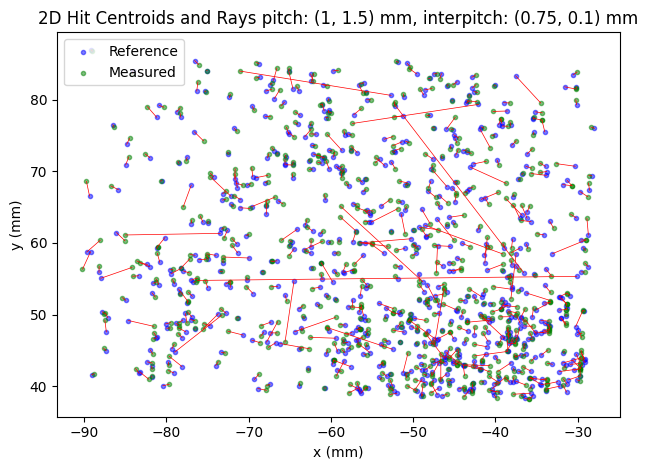

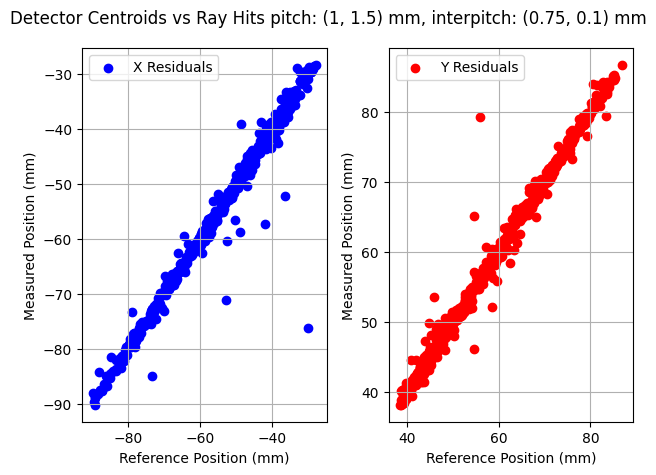

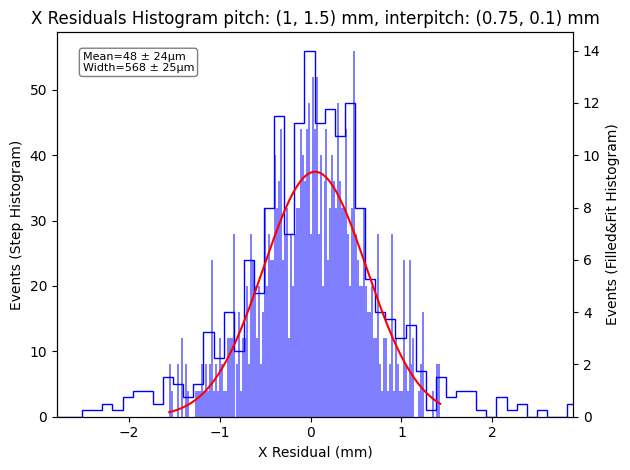

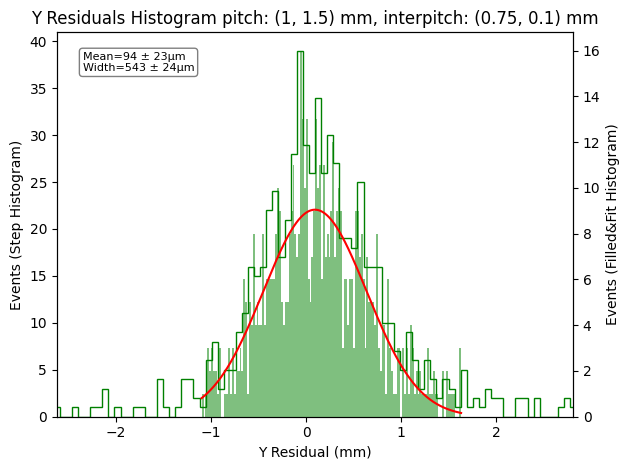

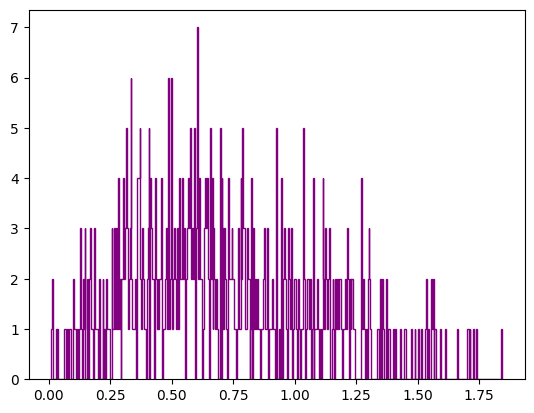

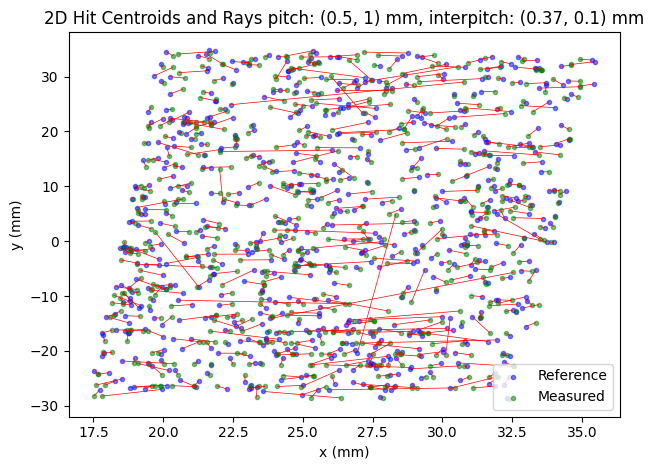

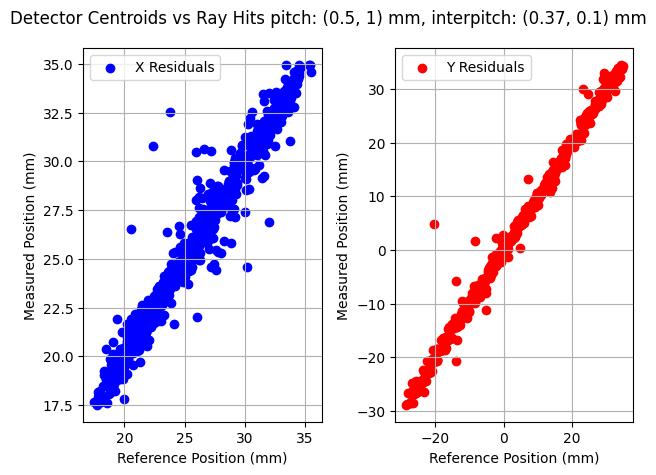

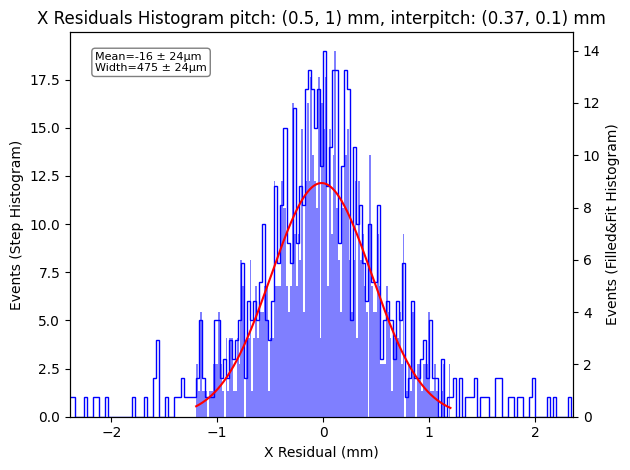

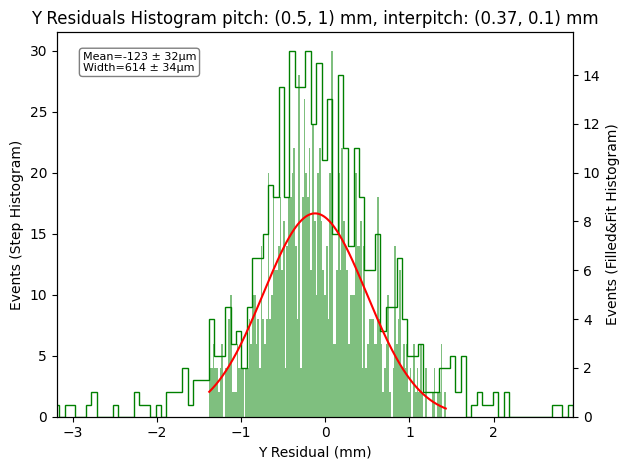

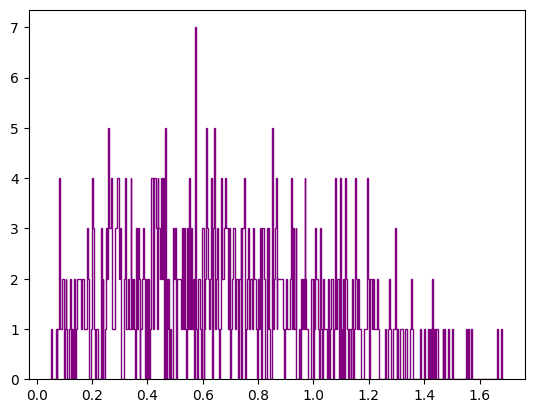

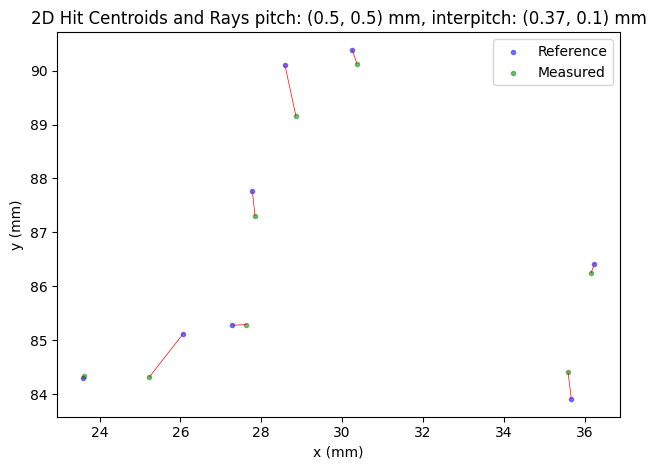

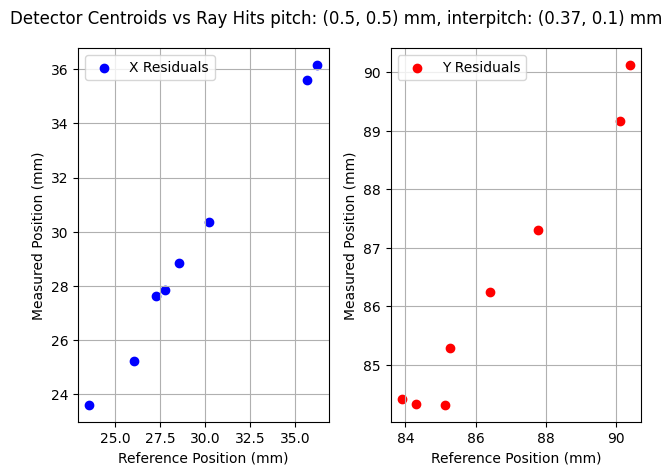

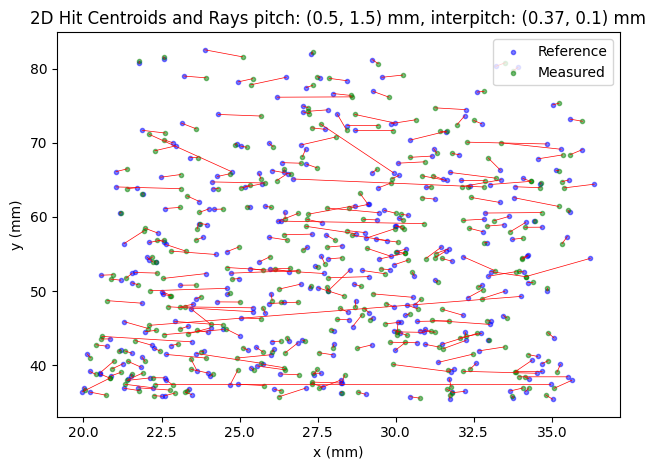

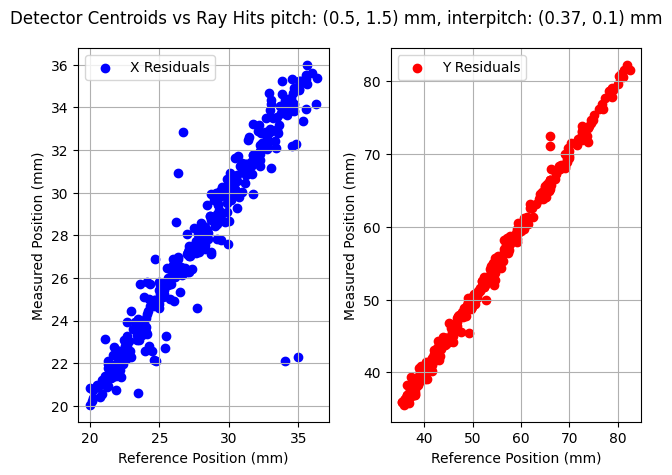

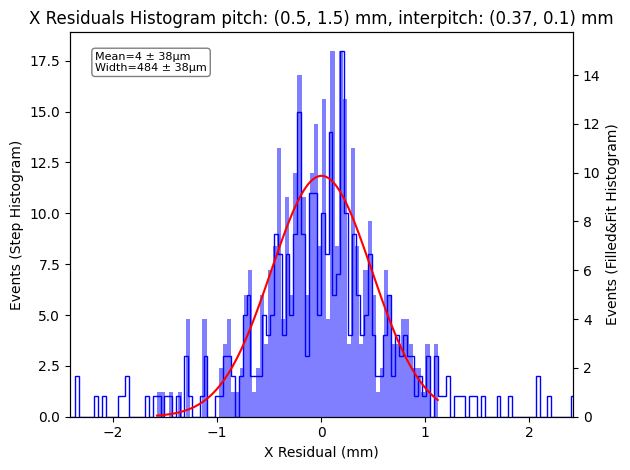

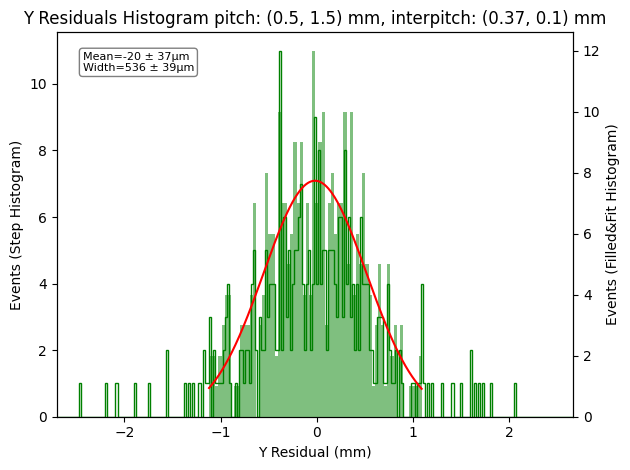

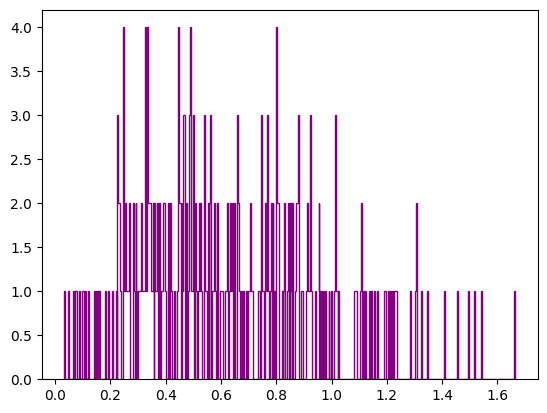

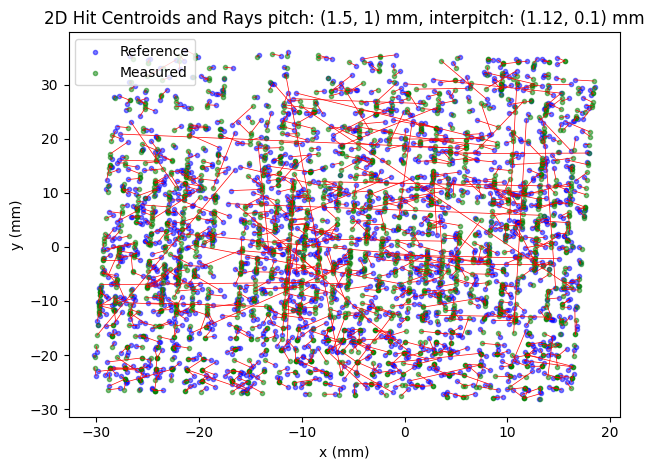

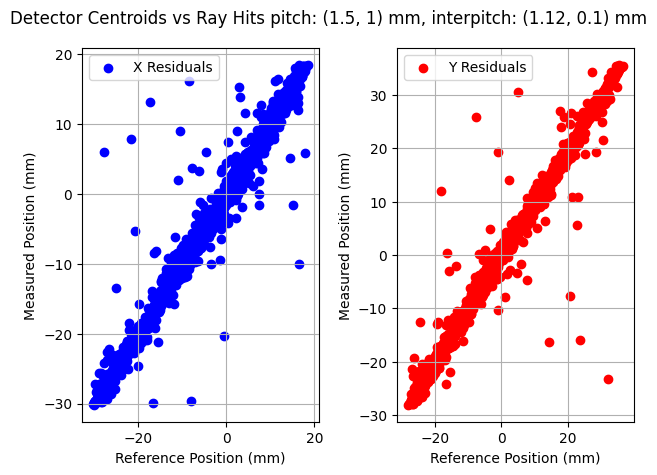

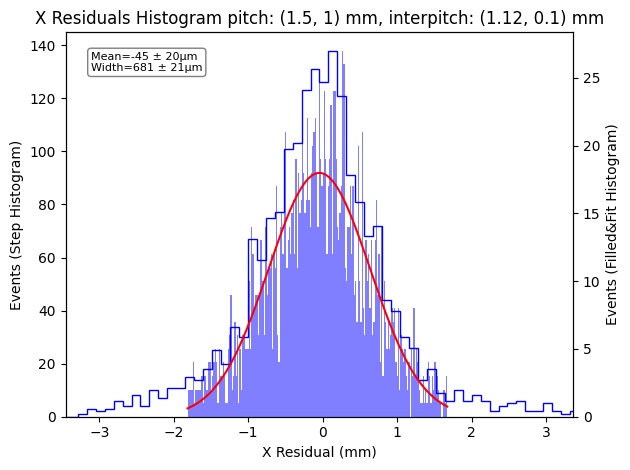

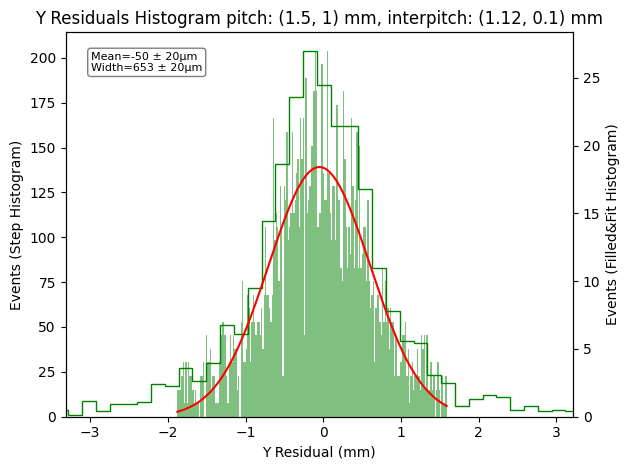

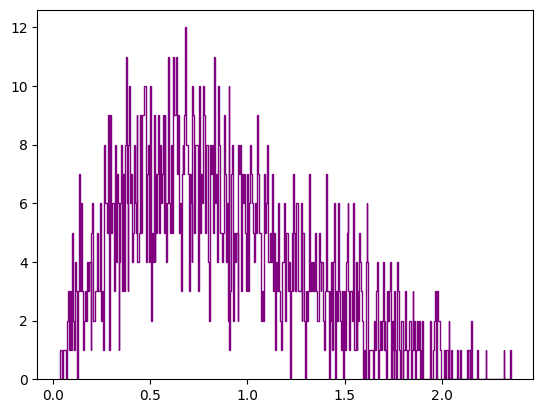

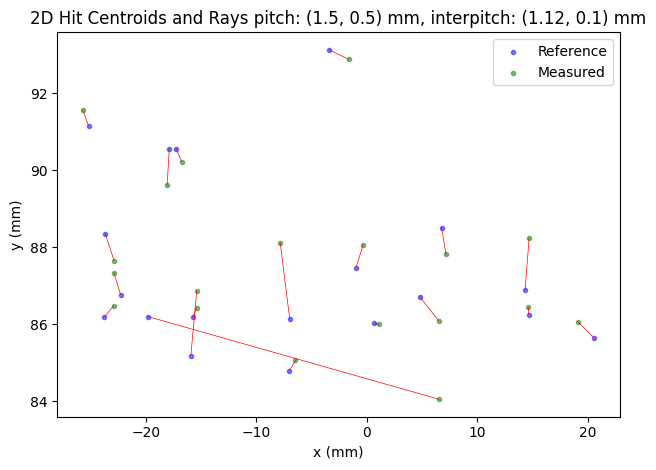

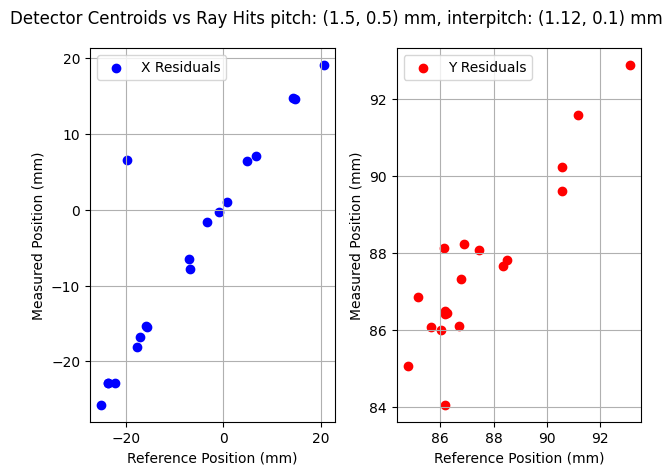

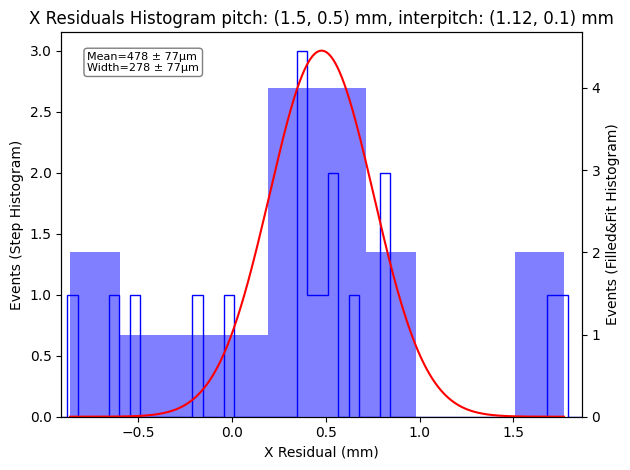

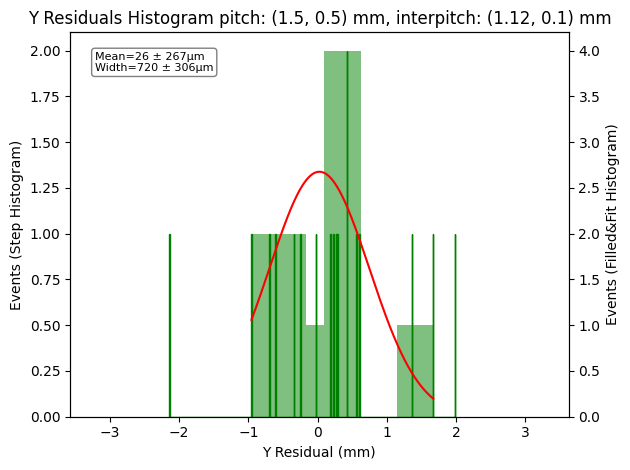

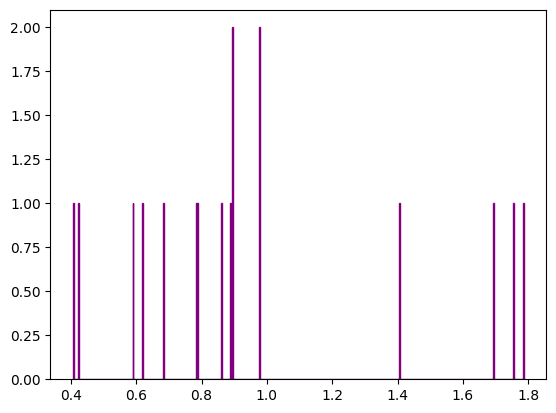

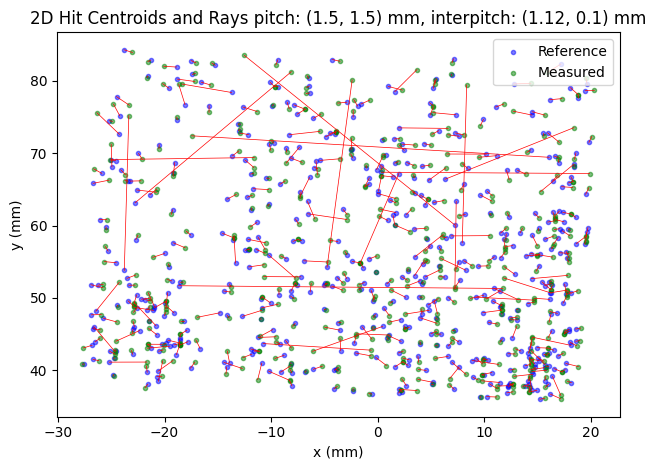

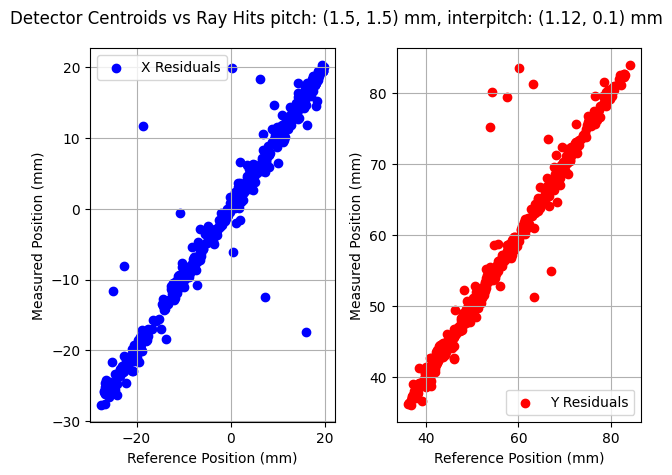

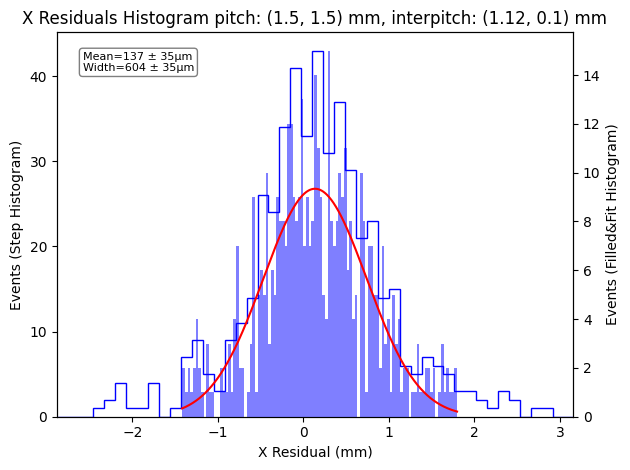

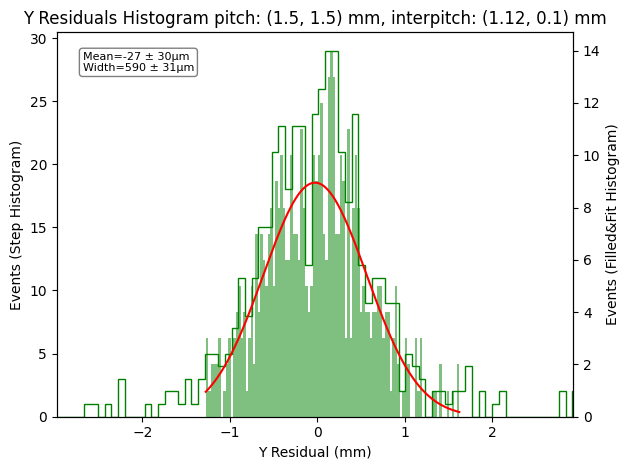

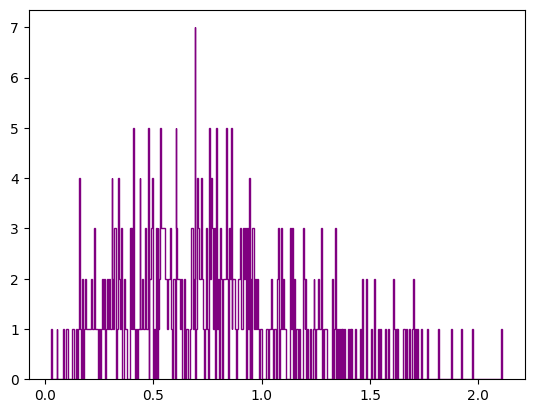

In [18]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

New stuff above